# Sea Levels Visualization and Analysis 

In [476]:
import pandas as pd
import matplotlib.pyplot as plt

In [477]:
# Define the filename of the CSV file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the CSV file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

In [478]:
# Display first 10 rows of the sea level data
sea_level_data.head(10)

,Time,Sea Level
0,2022-12-28T00:00:00.000Z,1.7337
1,2022-12-28T00:15:00.000Z,1.7177
2,2022-12-28T00:30:00.000Z,1.7067
3,2022-12-28T00:45:00.000Z,1.6987
4,2022-12-28T01:00:00.000Z,1.6837
5,2022-12-28T01:15:00.000Z,1.6727
6,2022-12-28T01:30:00.000Z,1.6527
7,2022-12-28T01:45:00.000Z,1.6367
8,2022-12-28T02:00:00.000Z,1.6167
9,2022-12-28T02:15:00.000Z,1.6047


In [490]:
sea_level_data

,Time,Sea Level
0,2022-12-28T00:00:00.000Z,1.7337
1,2022-12-28T00:15:00.000Z,1.7177
2,2022-12-28T00:30:00.000Z,1.7067
3,2022-12-28T00:45:00.000Z,1.6987
4,2022-12-28T01:00:00.000Z,1.6837
...,...,...
5796,2023-02-26T09:00:00.000Z,1.3787
5797,2023-02-26T09:15:00.000Z,1.3887
5798,2023-02-26T09:30:00.000Z,1.4057
5799,2023-02-26T09:45:00.000Z,1.4127


In [479]:
# Column Names
sea_level_data.columns

Index(['Time', 'Sea Level'], dtype='object')

In [480]:
# Extract the time and sea level data into separate arrays
time_data = sea_level_data['Time']
sea_level = sea_level_data['Sea Level']

In [481]:
# Shape of arrays
print(f"Shape of Time and Sea Level Arrays: {time_data.shape}")

Shape of Time and Sea Level Arrays: (5801,)


In [482]:
time_data

0       2022-12-28T00:00:00.000Z
1       2022-12-28T00:15:00.000Z
2       2022-12-28T00:30:00.000Z
3       2022-12-28T00:45:00.000Z
4       2022-12-28T01:00:00.000Z
                  ...           
5796    2023-02-26T09:00:00.000Z
5797    2023-02-26T09:15:00.000Z
5798    2023-02-26T09:30:00.000Z
5799    2023-02-26T09:45:00.000Z
5800    2023-02-26T10:00:00.000Z
Name: Time, Length: 5801, dtype: object

In [483]:
sea_level

0       1.7337
1       1.7177
2       1.7067
3       1.6987
4       1.6837
         ...  
5796    1.3787
5797    1.3887
5798    1.4057
5799    1.4127
5800    1.4247
Name: Sea Level, Length: 5801, dtype: float64

In [484]:
# # Create a line plot of the sea level data
# plt.plot(sea_level_data["Time"], sea_level_data["Sea Level"])

# # Add grid lines to the plot
# plt.grid(True)

# # Add x and y axis labels and plot title
# plt.xlabel('Time (days)')
# plt.ylabel('Sea level (meters)')
# plt.title('Sea Level Displacement over 60 Days')

# # Display the plot
# plt.show()

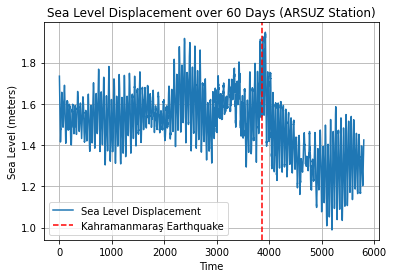

In [485]:
sea_level_data.plot()
plt.axvline(x=3857, color='r', linestyle = "--", label='Kahramanmaraş Earthquake')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Sea Level (meters)")
plt.legend(["Sea Level Displacement", "Kahramanmaraş Earthquake"])
plt.title("Sea Level Displacement over 60 Days (ARSUZ Station)");

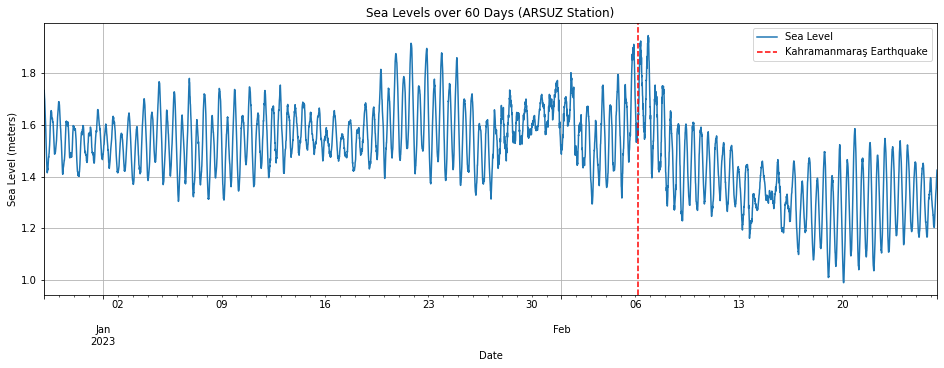

In [431]:
sea_level_data_copy = sea_level_data.copy()

# Convert the "Time" column to a datetime object
sea_level_data_copy['Time'] = pd.to_datetime(sea_level_data_copy['Time'])

# Set the "Time" column as the index
sea_level_data_copy.set_index('Time', inplace=True)

# Create a line plot of the sea level data
ax = sea_level_data_copy.plot(figsize=(16,5), legend=False)

plt.axvline(x='2023-02-06T04:15:00.000Z', color='r', linestyle = "--", label='Kahramanmaraş Earthquake')

# Add x and y axis labels and plot title
ax.set_xlabel('Date')
ax.set_ylabel('Sea Level (meters)')
ax.set_title('Sea Levels over 60 Days (ARSUZ Station)')

# Display the plot
plt.legend(["Sea Level", "Kahramanmaraş Earthquake"])
plt.grid()
plt.show()

In [432]:
sea_level_data.dtypes

Time          object
Sea Level    float64
dtype: object

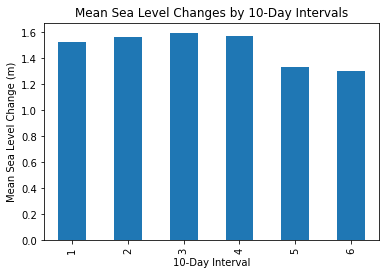

In [433]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Create a new column that groups the data into approximately 10-day intervals
sea_level_data['10-Day Interval'] = (sea_level_data['Time'].dt.dayofyear - 1) // 10 + 1

# Filter out the 7th 10-day interval
sea_level_data = sea_level_data[sea_level_data['10-Day Interval'] != 37]

# Group the sea level data by 10-day interval and calculate the mean sea level change for each interval
interval_means = sea_level_data.groupby('10-Day Interval')['Sea Level'].mean()

# Create a bar chart of the mean sea level changes for every 10-day interval, excluding the 7th interval
interval_means.plot(kind='bar', x='10-Day Interval', y='Sea Level', title='Mean Sea Level Changes by 10-Day Intervals')

# Add the mean value of each 10-day interval on top of each bar
for i, v in enumerate(interval_means):
    ax.text(i - 0.1, v + 0.01, str(round(v, 2)), color='black')
    
plt.xlabel('10-Day Interval')
plt.ylabel('Mean Sea Level Change (m)')
plt.show()

Interval 1: 2023-01-01 00:00:00+00:00 to 2023-01-10 23:45:00+00:00
Interval 2: 2023-01-11 00:00:00+00:00 to 2023-01-20 23:45:00+00:00
Interval 3: 2023-01-21 00:00:00+00:00 to 2023-01-30 23:45:00+00:00
Interval 4: 2023-01-31 00:00:00+00:00 to 2023-02-09 23:45:00+00:00
Interval 5: 2023-02-10 00:00:00+00:00 to 2023-02-19 23:45:00+00:00
Interval 6: 2023-02-20 00:00:00+00:00 to 2023-02-26 10:00:00+00:00


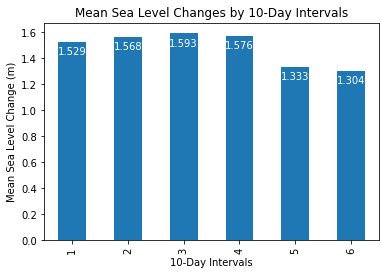

In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Create a new column that groups the data into approximately 10-day intervals
sea_level_data['10-Day Interval'] = (sea_level_data['Time'].dt.dayofyear - 1) // 10 + 1

# Filter out the 7th 10-day interval
sea_level_data = sea_level_data[sea_level_data['10-Day Interval'] != 37]

# Group the sea level data by 10-day interval and calculate the mean sea level change for each interval
interval_means = sea_level_data.groupby('10-Day Interval')['Sea Level'].mean()

# Create a bar chart of the mean sea level changes for every 10-day interval, excluding the 7th interval
ax = interval_means.plot(kind='bar', x='10-Day Interval', y='Sea Level', title='Mean Sea Level Changes by 10-Day Intervals')
ax.set_xlabel('10-Day Intervals')
ax.set_ylabel('Mean Sea Level Change (m)')

# Add the mean value of each 10-day interval on top of each bar
for i, v in enumerate(interval_means):
    ax.text(i - 0.26, v - 0.1, str(round(v, 3)), color='white')
    
# Group the sea level data by 10-day interval
interval_groups = sea_level_data.groupby('10-Day Interval')

# Loop through each group and print the beginning and end times
for interval, group in interval_groups:
    begin_time = group['Time'].iloc[0]
    end_time = group['Time'].iloc[-1]
    print(f"Interval {interval}: {begin_time} to {end_time}")


plt.show()

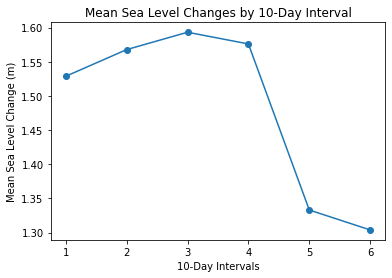

In [435]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Create a new column that groups the data into approximately 10-day intervals
sea_level_data['10-Day Interval'] = (sea_level_data['Time'].dt.dayofyear - 1) // 10 + 1

# Filter out the 7th 10-day interval
sea_level_data = sea_level_data[sea_level_data['10-Day Interval'] != 37]

# Group the sea level data by 10-day interval and calculate the mean sea level change for each interval
interval_means = sea_level_data.groupby('10-Day Interval')['Sea Level'].mean()

# Create a scatter plot of the mean sea level changes for each 10-day interval, with lines connecting the points
plt.plot(interval_means.index, interval_means.values, '-o')
plt.title('Mean Sea Level Changes by 10-Day Interval')
plt.xlabel('10-Day Intervals')
plt.ylabel('Mean Sea Level Change (m)')
plt.show()


Interval 1: 2023-01-01 00:00:00+00:00 to 2023-01-05 23:45:00+00:00
Interval 2: 2023-01-06 00:00:00+00:00 to 2023-01-10 23:45:00+00:00
Interval 3: 2023-01-11 00:00:00+00:00 to 2023-01-15 23:45:00+00:00
Interval 4: 2023-01-16 00:00:00+00:00 to 2023-01-20 23:45:00+00:00
Interval 5: 2023-01-21 00:00:00+00:00 to 2023-01-25 23:45:00+00:00
Interval 6: 2023-01-26 00:00:00+00:00 to 2023-01-30 23:45:00+00:00
Interval 7: 2023-01-31 00:00:00+00:00 to 2023-02-04 23:45:00+00:00
Interval 8: 2023-02-05 00:00:00+00:00 to 2023-02-09 23:45:00+00:00
Interval 9: 2023-02-10 00:00:00+00:00 to 2023-02-14 23:45:00+00:00
Interval 10: 2023-02-15 00:00:00+00:00 to 2023-02-19 23:45:00+00:00
Interval 11: 2023-02-20 00:00:00+00:00 to 2023-02-24 23:45:00+00:00
Interval 12: 2023-02-25 00:00:00+00:00 to 2023-02-26 10:00:00+00:00


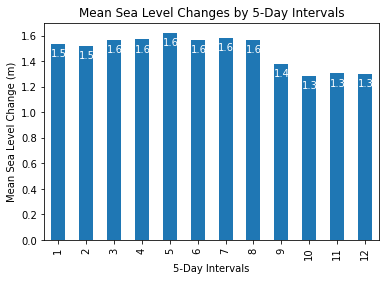

In [436]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Create a new column that groups the data into approximately 5-day intervals
sea_level_data['5-Day Interval'] = (sea_level_data['Time'].dt.dayofyear - 1) // 5 + 1

# Filter out the anomalous interval
sea_level_data = sea_level_data[sea_level_data['5-Day Interval'] != 73]

# Group the sea level data by 5-day interval and calculate the mean sea level change for each interval
interval_means = sea_level_data.groupby('5-Day Interval')['Sea Level'].mean()

# Create a bar chart of the mean sea level changes for every 5-day interval, excluding the anomalous interval
ax = interval_means.plot(kind='bar', x='5-Day Interval', y='Sea Level', title='Mean Sea Level Changes by 5-Day Intervals')
ax.set_xlabel('5-Day Intervals')
ax.set_ylabel('Mean Sea Level Change (m)')

# Add the mean value of each 5-day interval on top of each bar
for i, v in enumerate(interval_means):
    ax.text(i - 0.26, v - 0.1, str(round(v, 1)), color='white')
    
# Group the sea level data by 10-day interval
interval_groups = sea_level_data.groupby('5-Day Interval')

# Loop through each group and print the beginning and end times
for interval, group in interval_groups:
    begin_time = group['Time'].iloc[0]
    end_time = group['Time'].iloc[-1]
    print(f"Interval {interval}: {begin_time} to {end_time}")

plt.show()

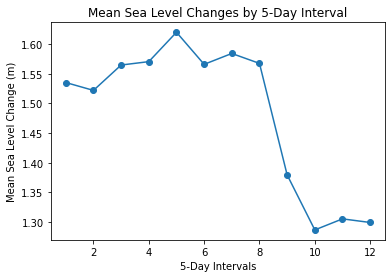

In [437]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Create a new column that groups the data into approximately 5-day intervals
sea_level_data['5-Day Interval'] = (sea_level_data['Time'].dt.dayofyear - 1) // 5 + 1

# Filter out the anomalous interval
sea_level_data = sea_level_data[sea_level_data['5-Day Interval'] != 73]

# Group the sea level data by 5-day interval and calculate the mean sea level change for each interval
interval_means = sea_level_data.groupby('5-Day Interval')['Sea Level'].mean()

# Create a scatter plot of the mean sea level changes for each 5-day interval, with lines connecting the points
plt.plot(interval_means.index, interval_means.values, '-o')
plt.title('Mean Sea Level Changes by 5-Day Interval')
plt.xlabel('5-Day Intervals')
plt.ylabel('Mean Sea Level Change (m)')
plt.show()

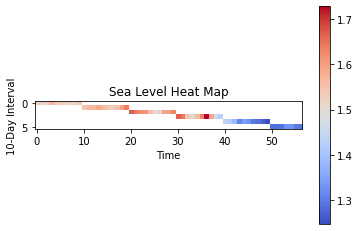

In [438]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filename of the Excel file containing the sea level data
filename = r"C:\Users\Badie\Desktop\TUDES_Tudes_veri.xlsx"

# Read the Excel file and assign the data to the sea_level_data variable
sea_level_data = pd.read_excel(filename, header=0)

# Convert the "Time" column to a datetime object
sea_level_data['Time'] = pd.to_datetime(sea_level_data['Time'])

###

# Interpolate the sea level data to fill in missing values and make it evenly spaced
date_range = pd.date_range(sea_level_data['Time'].min(), sea_level_data['Time'].max(), freq='15T')
interpolated_data = sea_level_data.set_index('Time').reindex(date_range).interpolate()

# Create a new column that groups the data into approximately 10-day intervals
interpolated_data['10-Day Interval'] = (interpolated_data.index.dayofyear - 1) // 10 + 1

# Filter out the 7th 10-day interval
interpolated_data = interpolated_data[interpolated_data['10-Day Interval'] != 37]

# Pivot the sea level data to create a table with time intervals as rows and days as columns
pivot_table = interpolated_data.pivot_table(index='10-Day Interval', columns=interpolated_data.index.date, values='Sea Level')

# Convert the column labels to datetime objects
pivot_table.columns = pd.to_datetime(pivot_table.columns)

# Create a heat map of the sea level data
plt.imshow(pivot_table, cmap='coolwarm')
plt.colorbar()
plt.title('Sea Level Heat Map')
plt.xlabel('Time')
plt.ylabel('10-Day Interval')
plt.show()

The heat map shows the sea level changes over time, grouped by 10-day intervals. The y-axis of the heat map shows the 10-day intervals, with the first interval at the bottom and the last interval at the top. The x-axis shows the dates, with the earliest date on the left and the latest date on the right. Each square in the heat map represents the average sea level change for that 10-day interval on that date. Warmer colors (reds) represent higher sea level changes, and cooler colors (blues) represent lower sea level changes.

To read the heat map, you can start by looking at the y-axis to identify the 10-day intervals that you're interested in. You can then scan across each row to see how the sea level changes for that interval varied over time. You can also look at individual squares to see the average sea level change for a specific interval and date. The color of each square gives you an indication of how high or low the sea level change was for that interval and date.

The y-axis of the heat map shows the 10-day intervals of the sea level data. The data has been grouped into approximately 10-day intervals, and each interval has been assigned a number based on its position in the year. The first 10-day interval of the year is assigned the number 1, the second interval is assigned the number 2, and so on. The number of intervals depends on the length of the sea level data and the specific grouping criteria used.

The y-axis of the heat map shows these interval numbers, with the first interval at the bottom of the axis and the last interval at the top. This allows you to see how the sea level changes varied over time, grouped by 10-day intervals. By looking at the y-axis, you can identify which 10-day intervals had the highest and lowest sea level changes, and how these changes varied over time.

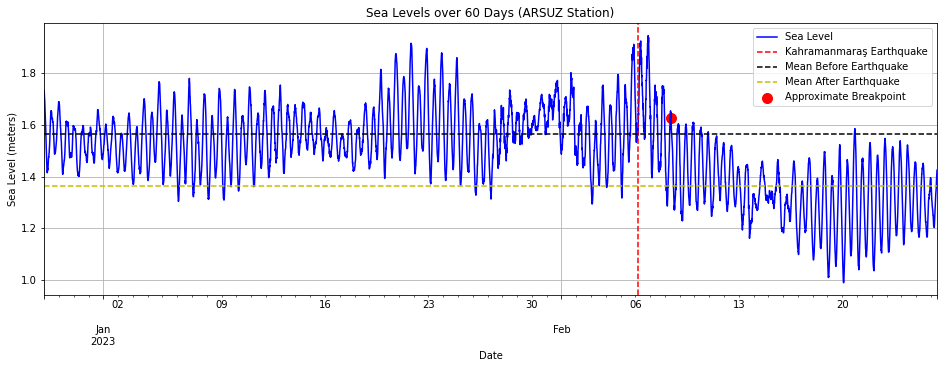

In [439]:
# Make a copy of the sea level data
sea_level_data_copy = sea_level_data.copy()

# Convert the "Time" column to a datetime object
sea_level_data_copy['Time'] = pd.to_datetime(sea_level_data_copy['Time'])

# Set the "Time" column as the index
sea_level_data_copy.set_index('Time', inplace=True)

# Specify the point in time that you're interested in
point_in_time = '2023-02-06T04:15:00.000Z'

# Compute the mean of all the values before the point in time
mean_before = sea_level_data_copy.loc[sea_level_data_copy.index < point_in_time, 'Sea Level'].mean()

# Compute the mean of all the values after the point in time
mean_after = sea_level_data_copy.loc[sea_level_data_copy.index >= point_in_time, 'Sea Level'].mean()

# Create a line plot of the sea level data
ax = sea_level_data_copy.plot(figsize=(16,5), legend=False, color="blue")

# Plot a vertical line at the point in time
plt.axvline(x=point_in_time, color='r', linestyle='--', label='Kahramanmaraş Earthquake')

# Plot two horizontal lines at the mean values
plt.axhline(y=mean_before, color='k', linestyle='--', label='Mean Before Earthquake')
plt.axhline(y=mean_after, color='y', linestyle='--', label='Mean After Earthquake')

# Time Instant:
index =  4070

# Add a red dot at the provided time instant
ax.scatter(x=sea_level_data["Time"][index], y=sea_level_data["Sea Level"][index], s=100, color='r', label="Approximate Breakpoint")

# Add x and y axis labels and plot title
ax.set_xlabel('Date')
ax.set_ylabel('Sea Level (meters)')
ax.set_title('Sea Levels over 60 Days (ARSUZ Station)')

# Display the plot
plt.legend()
plt.grid()
plt.show()

**Personal Definition of Breakpoint:** Strong deviation from average value before earthquake 

# Earthquake Visualization and Analysis 

In [395]:
# !pip install obspy

In [440]:
import obspy
import matplotlib.pyplot as plt
import numpy as np 

In [451]:
st = obspy.read(r"C:\Users\Badie\Desktop\Package_1677426034695.mseed")

In [452]:
st

3 Trace(s) in Stream:
KO.KMRS..HHE | 2023-02-06T01:12:05.690000Z - 2023-02-06T01:22:37.730000Z | 100.0 Hz, 63205 samples
KO.KMRS..HHN | 2023-02-06T01:12:23.650000Z - 2023-02-06T01:22:37.920000Z | 100.0 Hz, 61428 samples
KO.KMRS..HHZ | 2023-02-06T01:11:53.890000Z - 2023-02-06T01:22:36.110000Z | 100.0 Hz, 64223 samples

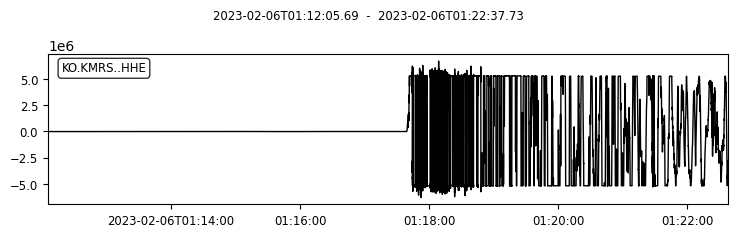

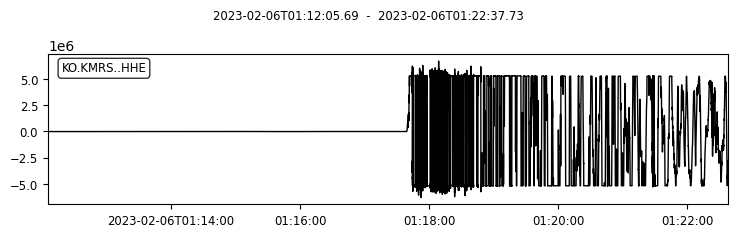

In [453]:
st[0].plot()

In [486]:
st[2].stats

         network: KO
         station: KMRS
        location: 
         channel: HHZ
       starttime: 2023-02-06T01:11:53.890000Z
         endtime: 2023-02-06T01:22:36.110000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 64223
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 393216})

## Five Minutes Before Earthquake (apparently "no-signal" in the above plot)

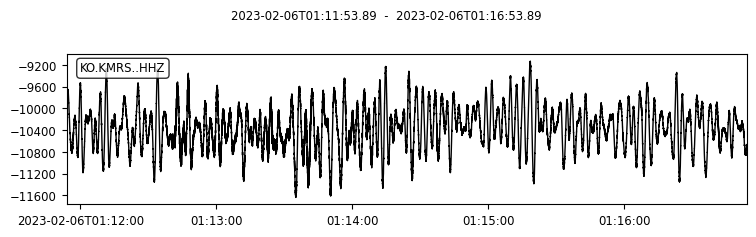

         network: KO
         station: KMRS
        location: 
         channel: HHZ
       starttime: 2023-02-06T01:11:53.890000Z
         endtime: 2023-02-06T01:16:53.890000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 30001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 393216})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2023, 2, 6, 1, 16, 53, 890000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 2, 6, 1, 11, 53, 890000))']


In [469]:
# Selecting a trace:
tr = st[2]

# Creating a copy of the trace to work on: 
tr_copy = tr.copy()

# Slicing and plotting first 5min (300 sec) time window of trace (channel): 
tr_slice = tr_copy.slice(starttime = tr.stats.starttime, endtime = tr.stats.starttime+300)

tr_slice.plot()
print(tr_slice.stats)
plt.show()

In [470]:
tr_slice.normalize()
tr_slice.detrend(type='constant')
tr_slice.taper(0.05,type="hann")

KO.KMRS..HHZ | 2023-02-06T01:11:53.890000Z - 2023-02-06T01:16:53.890000Z | 100.0 Hz, 30001 samples

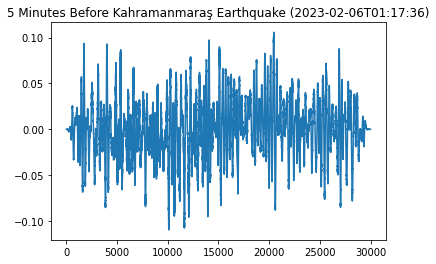

In [471]:
# Using Matplotlib Library:
plt.plot(tr_slice)
plt.title("5 Minutes Before Kahramanmaraş Earthquake (2023-02-06T01:17:36)")
plt.show()

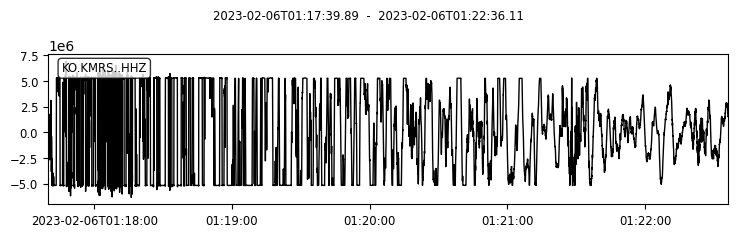

In [488]:
tr_slice = tr_copy.slice(starttime = tr.stats.starttime+346, endtime = tr.stats.starttime+346+300)
tr_slice.plot()
plt.show()

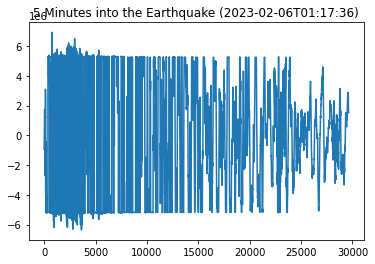

In [474]:
# Using Matplotlib Library:
plt.plot(tr_slice)
plt.title("5 Minutes into the Earthquake (2023-02-06T01:17:36)")
plt.show()

In [489]:
tr_slice.normalize()
tr_slice.detrend(type='constant')
tr_slice.taper(0.05,type="hann")

KO.KMRS..HHZ | 2023-02-06T01:17:39.890000Z - 2023-02-06T01:22:36.110000Z | 100.0 Hz, 29623 samples

In [487]:
tr_slice.stats

         network: KO
         station: KMRS
        location: 
         channel: HHZ
       starttime: 2023-02-06T01:17:39.890000Z
         endtime: 2023-02-06T01:22:36.110000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 29623
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 34, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 393216})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2023, 2, 6, 1, 22, 39, 890000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 2, 6, 1, 17, 39, 890000))']

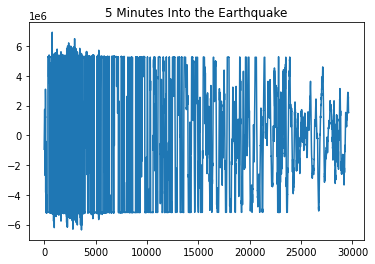

In [417]:
# Using Matplotlib Library:
plt.plot(tr_slice)
plt.title("5 mins into the Kahramanmaraş Earthquake (2023-02-06T01:17:36)")
plt.show()

Notice the difference in units between plots before and during earthquake!

## Spectrogram of Earthquake (2023-02-06T01:17:36)

In [379]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal

import obspy 
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from obspy.signal import PPSD

In [418]:
# Copy Stream to work on:
stream = st[0].copy

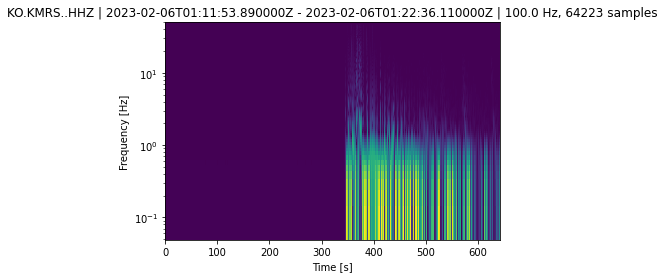

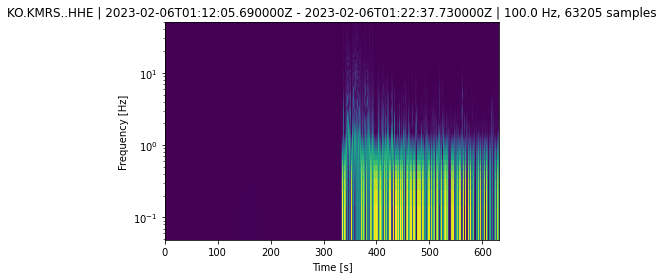

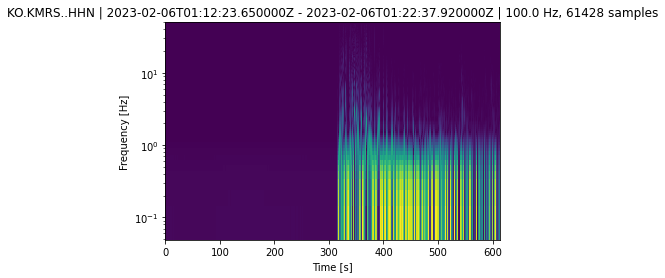

[None, None, None]

In [420]:
st.spectrogram(log=True)

In [385]:
# Reading stream inventory:
inv = obspy.read_inventory(r"C:\Users\Badie\Desktop\Package_1677426034695_0.xml")

# Showing instrument response details:
print(inv)

Inventory created at 2023-02-26T16:09:54.547123Z
	Sending institution: SeisComP (KOERI)
	Contains:
		Networks (1):
			KO
		Stations (1):
			KO.KMRS (Kahramanmaras, Turkey)
		Channels (3):
			KO.KMRS..HHZ, KO.KMRS..HHN, KO.KMRS..HHE


# Notes

Sea Level Changes Before Large Earthquakes  
https://pubs.er.usgs.gov/publication/70162491

In [173]:
sea_level_data["Time"][3857]

'2023-02-06T04:15:00.000Z'